<a href="https://colab.research.google.com/github/kavyabanka/Loan_Eligibility_Prediction/blob/main/Housing_loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Getting the system ready and loading the data

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [32]:
train_data = pd.read_csv("/content/loan_sanction_train.csv")
test_data = pd.read_csv("/content/loan_sanction_test.csv")

#Understanding the data

In [33]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [35]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [36]:
train_data.shape

(614, 13)

In [37]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#EDA

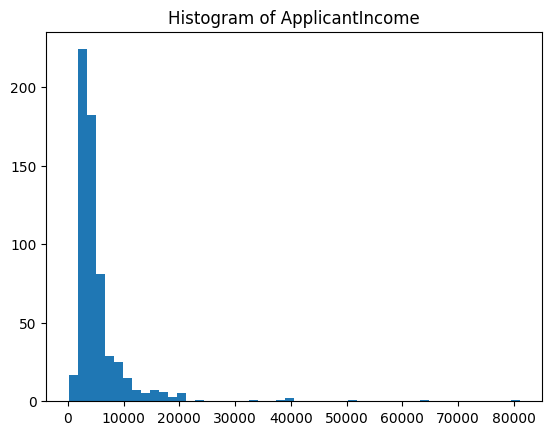

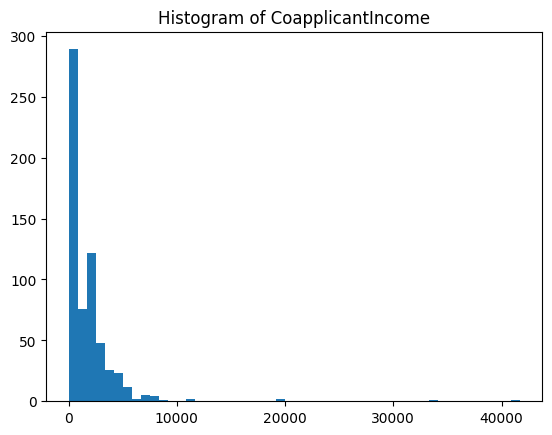

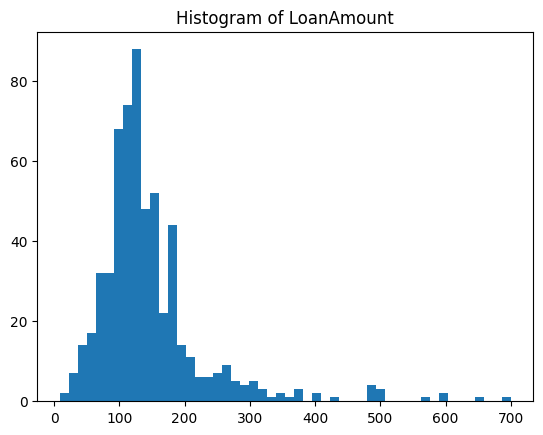

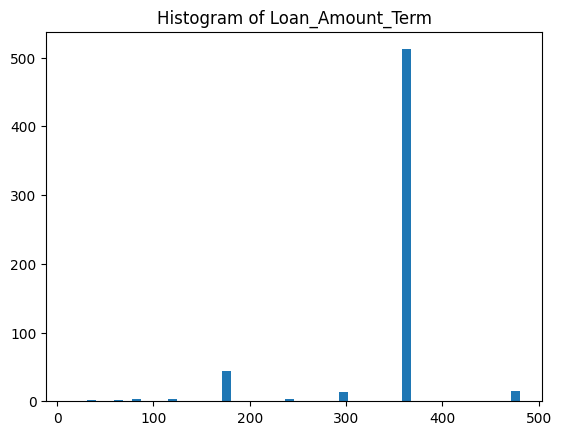

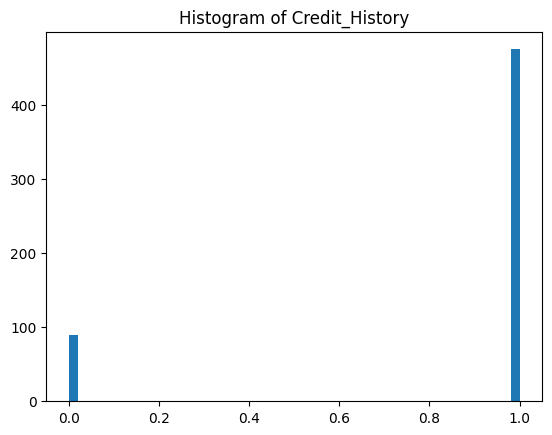

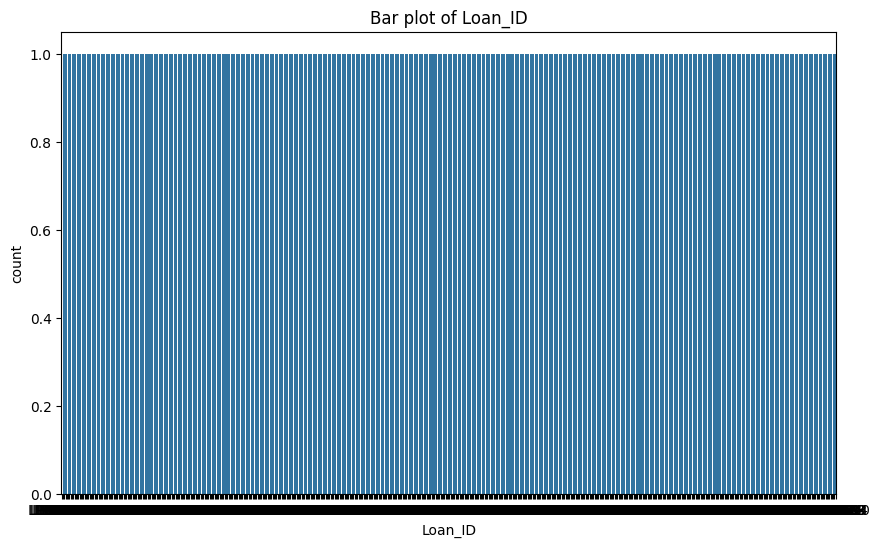

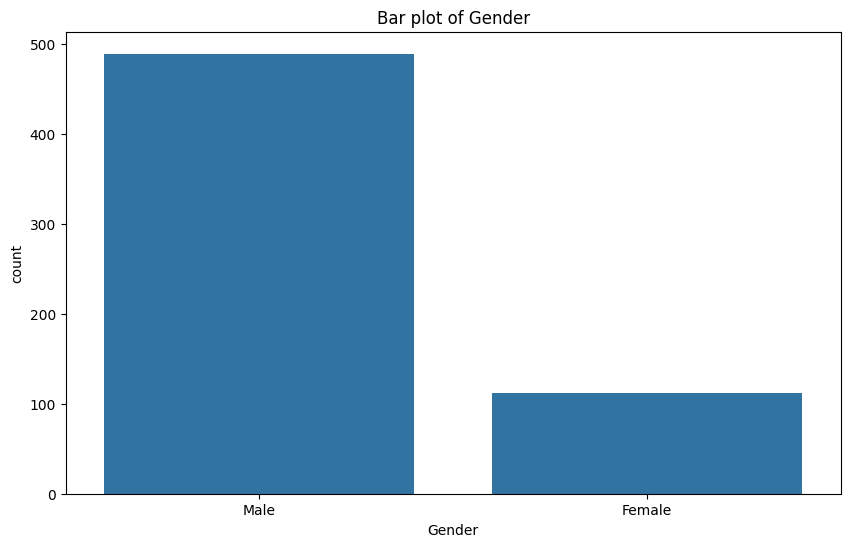

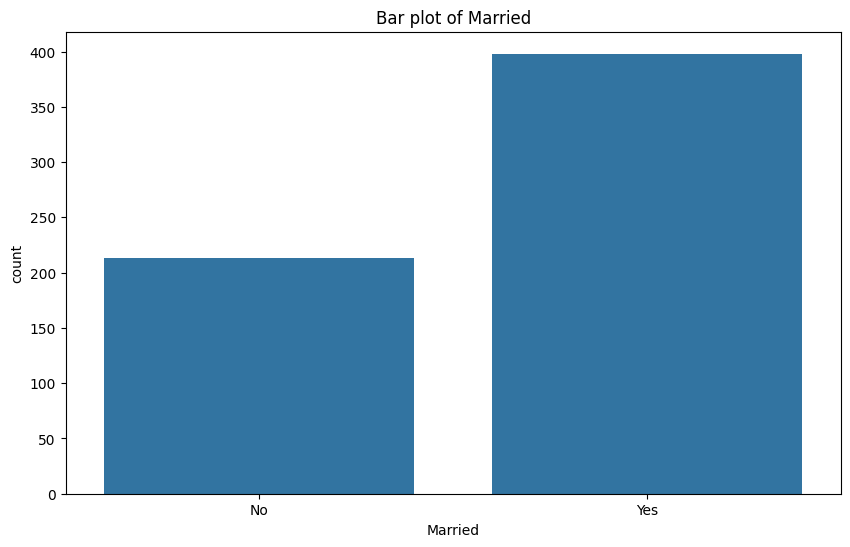

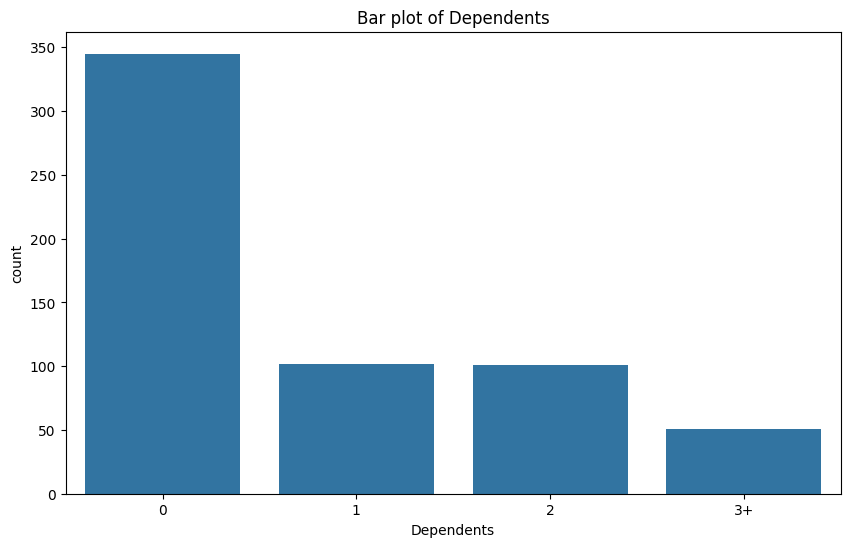

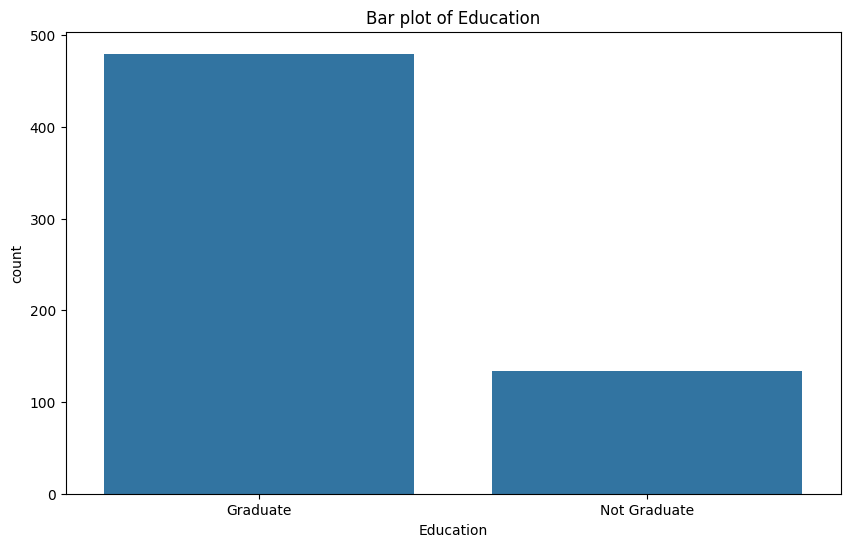

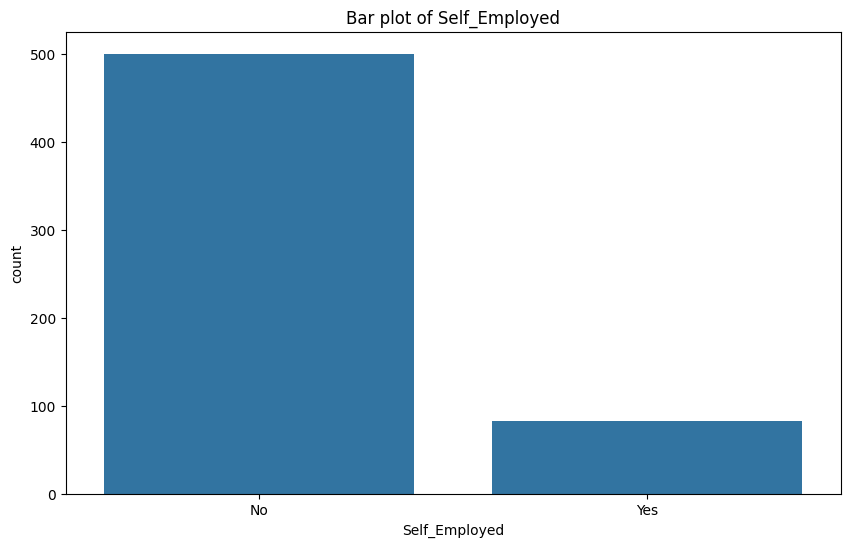

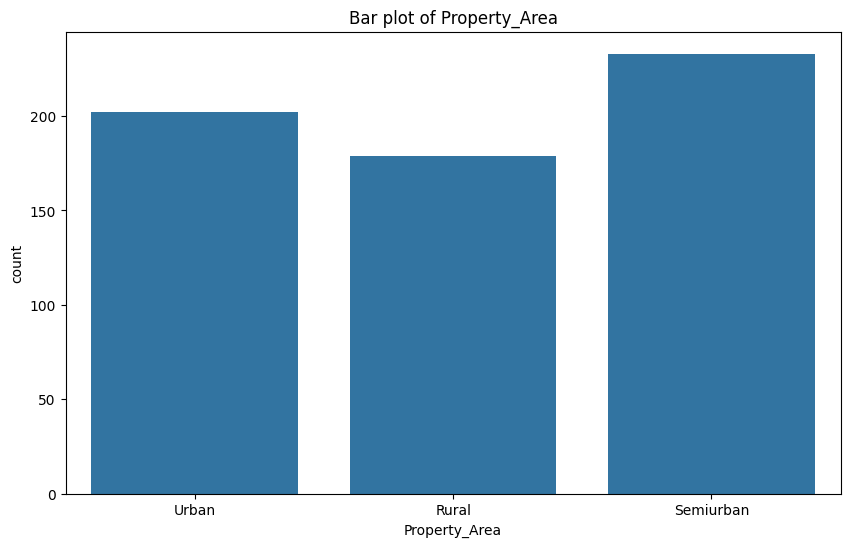

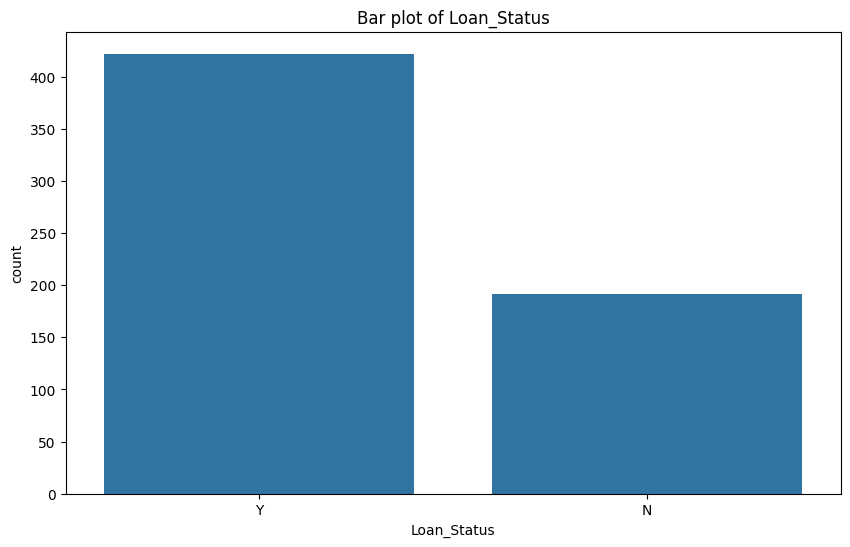

In [38]:
# Histograms for numerical columns
for col in train_data.select_dtypes(include=['int64', 'float64']).columns:
    plt.hist(train_data[col], bins=50)
    plt.title(f"Histogram of {col}")
    plt.show()

# Bar plots for categorical columns
for col in train_data.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=train_data)
    plt.title(f"Bar plot of {col}")
    plt.show()

#Perform Univariate Analysis

In [39]:
# Calculate the mean, median, and mode of each numerical column
for col in train_data.select_dtypes(include=['int64', 'float64']).columns:
    print(f"Mean of {col}: {train_data[col].mean()}")
    print(f"Median of {col}: {train_data[col].median()}")
    print(f"Mode of {col}: {train_data[col].mode()[0]}")
    print()

Mean of ApplicantIncome: 5403.459283387622
Median of ApplicantIncome: 3812.5
Mode of ApplicantIncome: 2500

Mean of CoapplicantIncome: 1621.2457980271008
Median of CoapplicantIncome: 1188.5
Mode of CoapplicantIncome: 0.0

Mean of LoanAmount: 146.41216216216216
Median of LoanAmount: 128.0
Mode of LoanAmount: 120.0

Mean of Loan_Amount_Term: 342.0
Median of Loan_Amount_Term: 360.0
Mode of Loan_Amount_Term: 360.0

Mean of Credit_History: 0.8421985815602837
Median of Credit_History: 1.0
Mode of Credit_History: 1.0



#Perform Bivariate Analysis

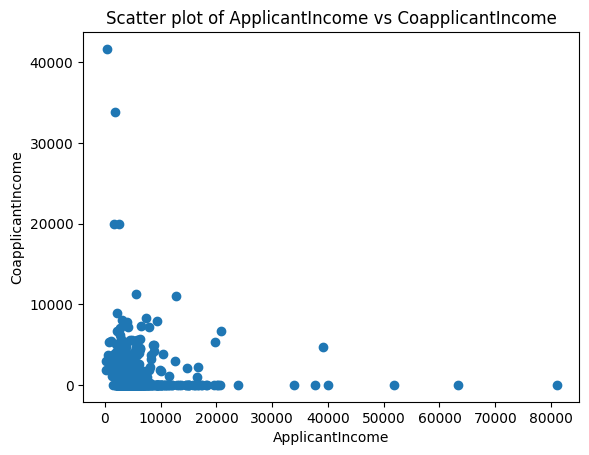

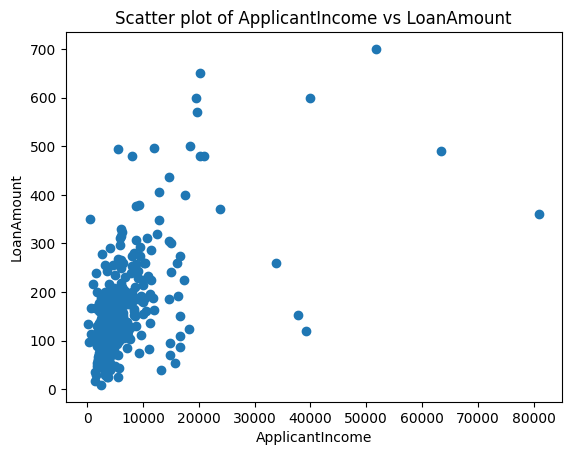

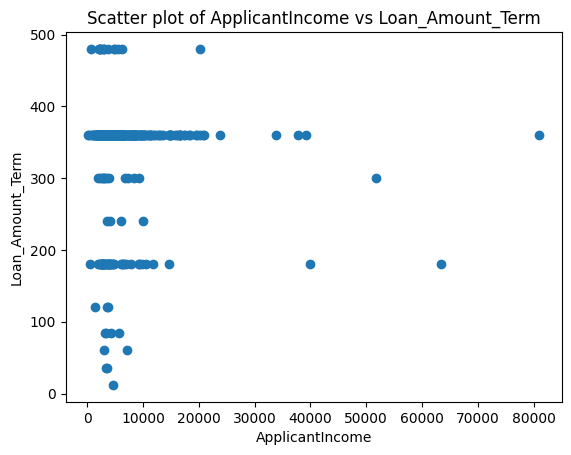

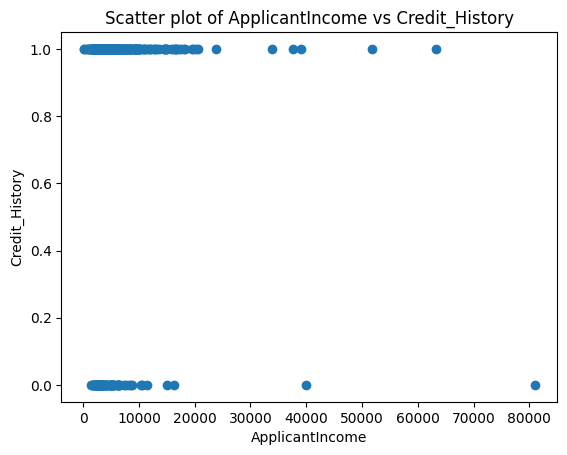

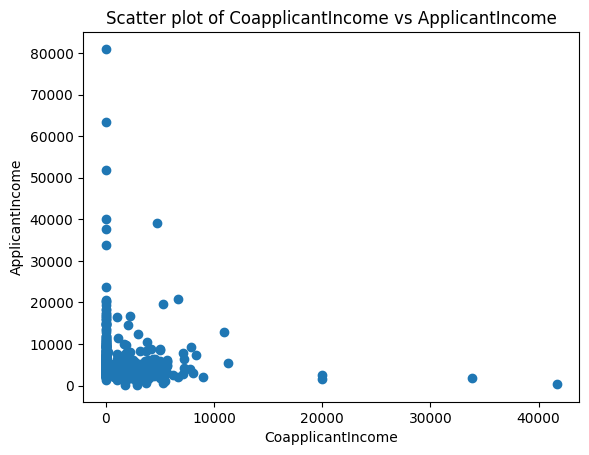

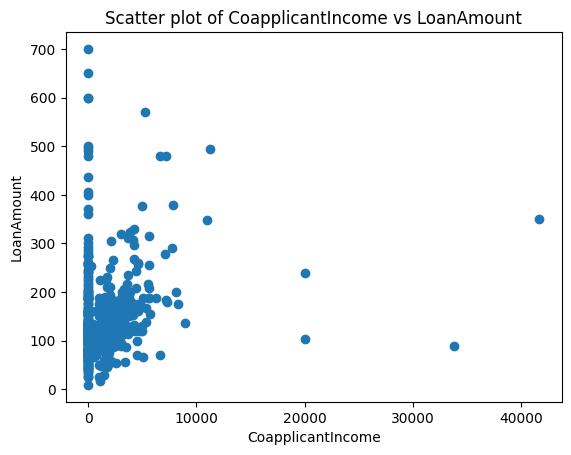

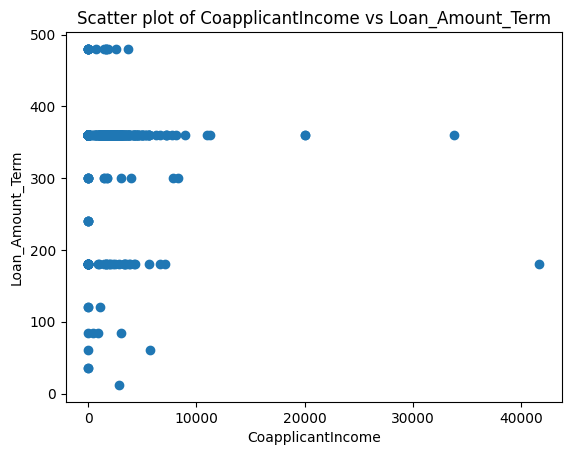

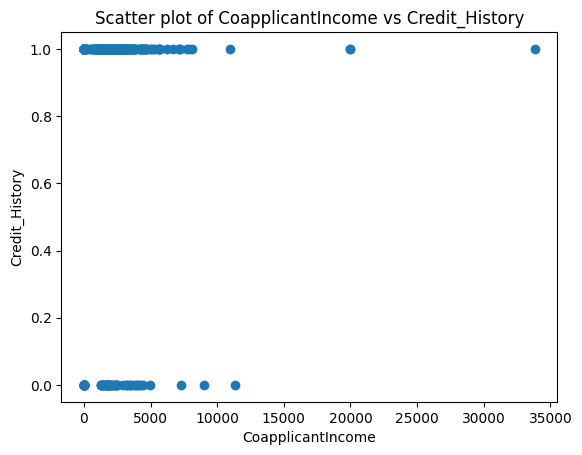

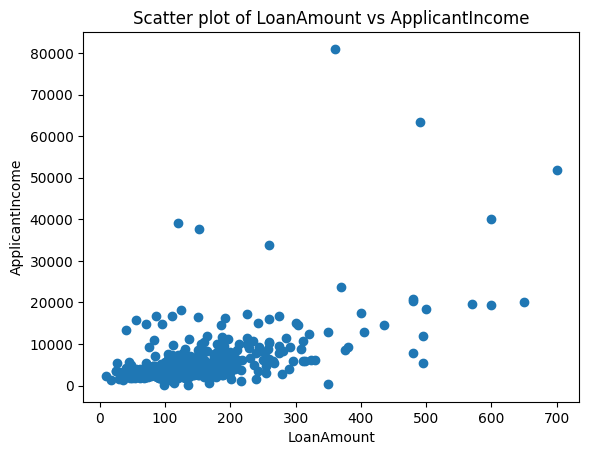

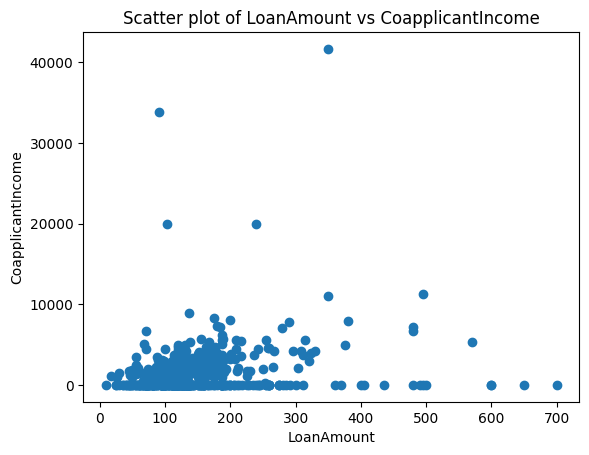

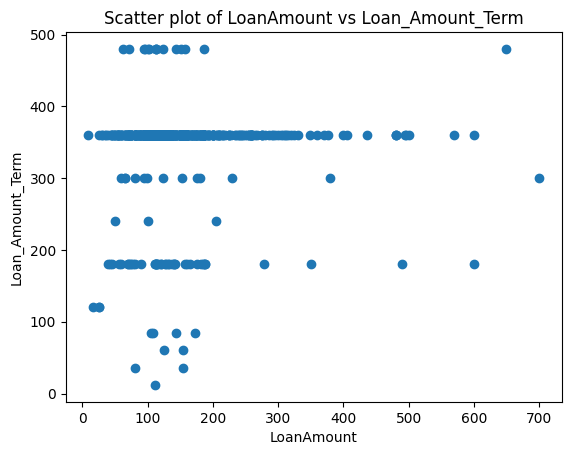

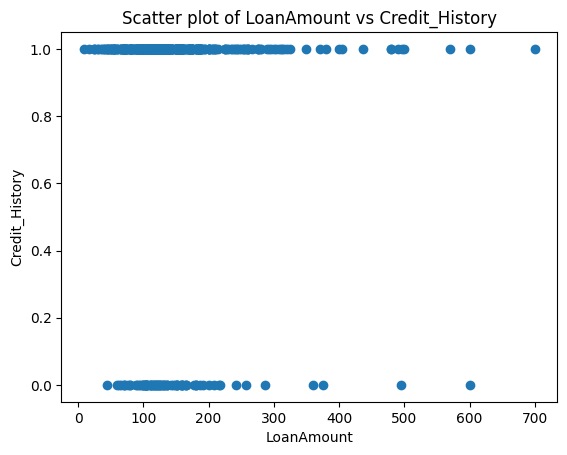

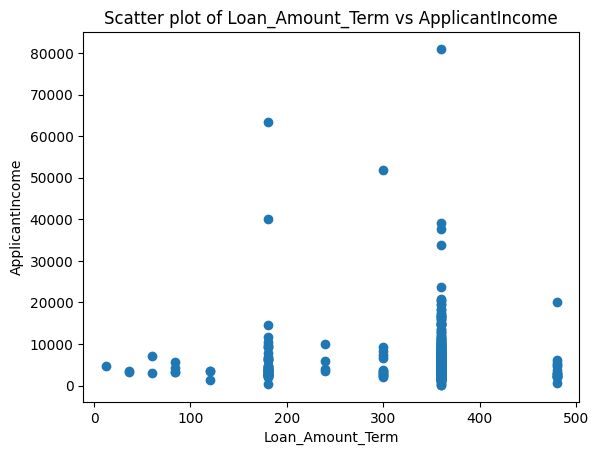

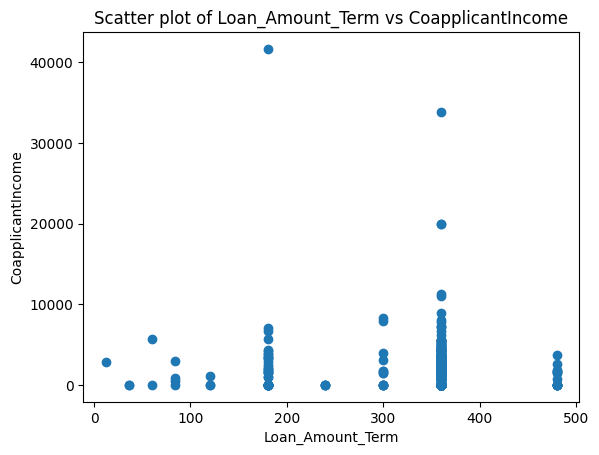

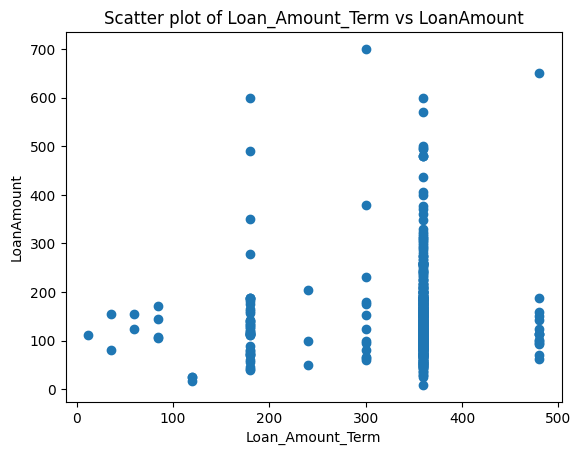

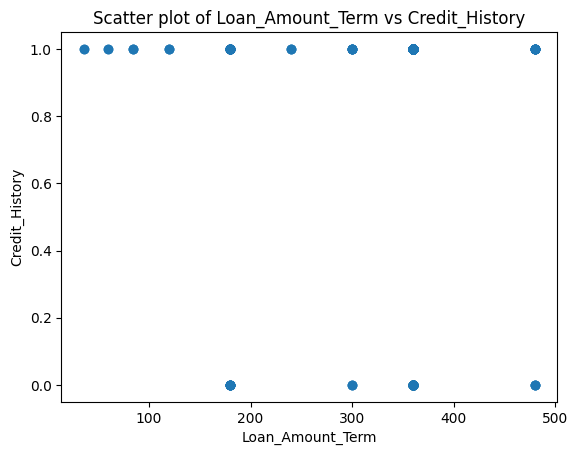

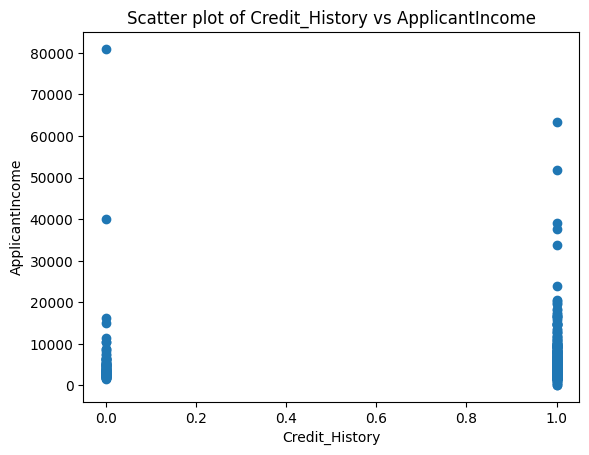

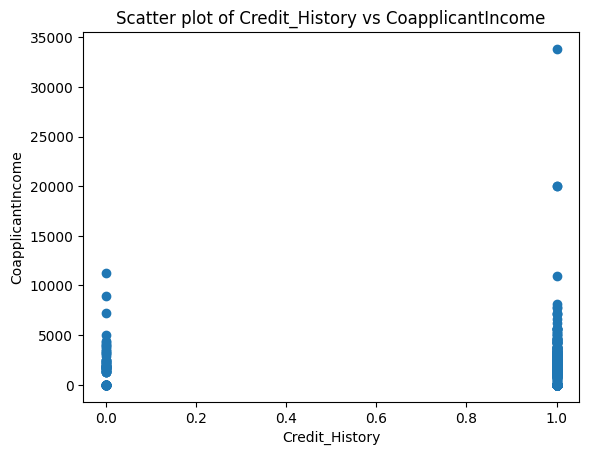

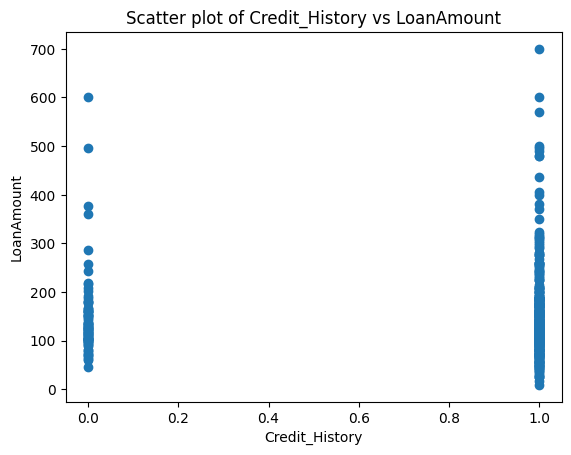

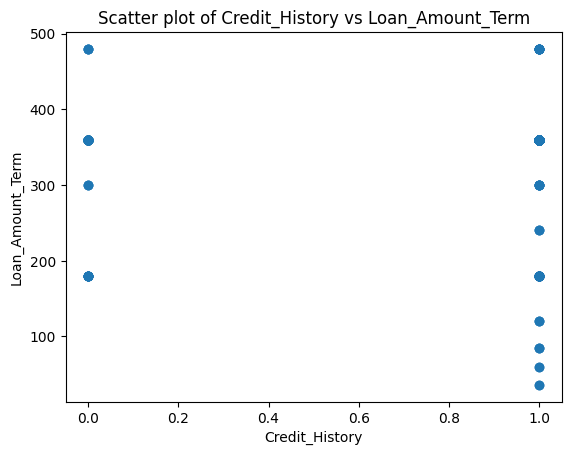

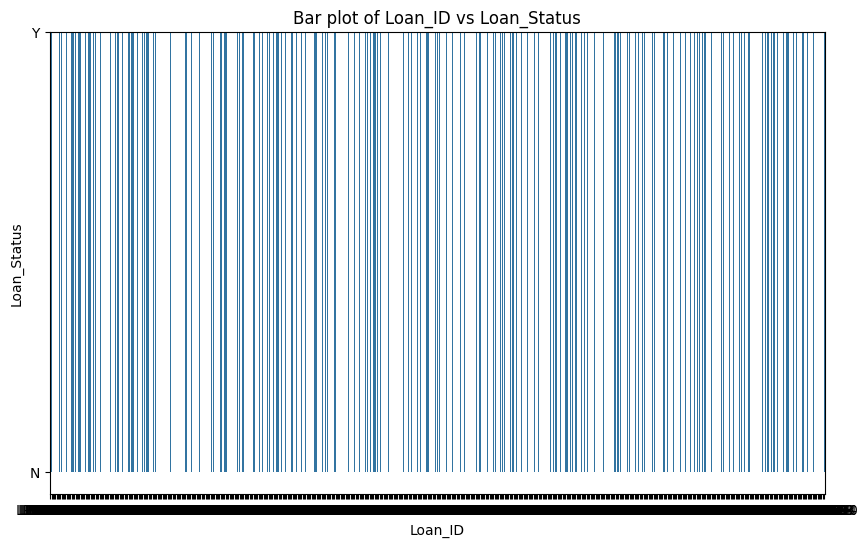

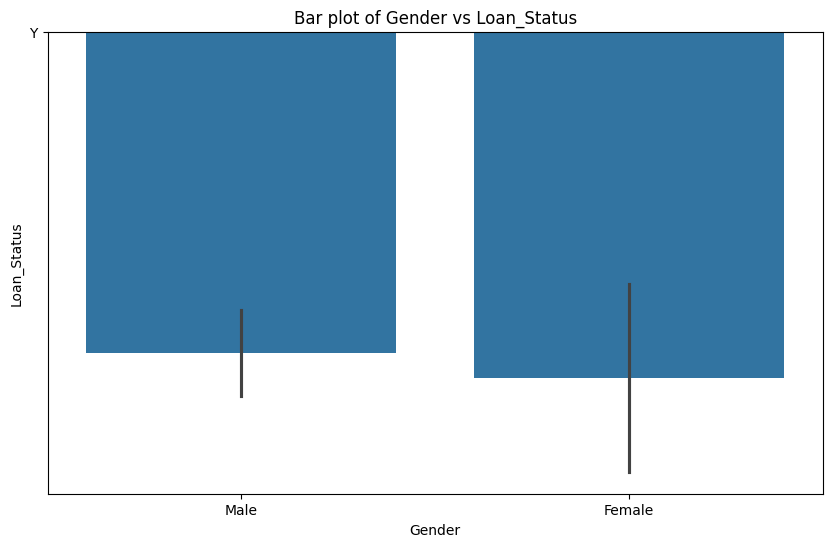

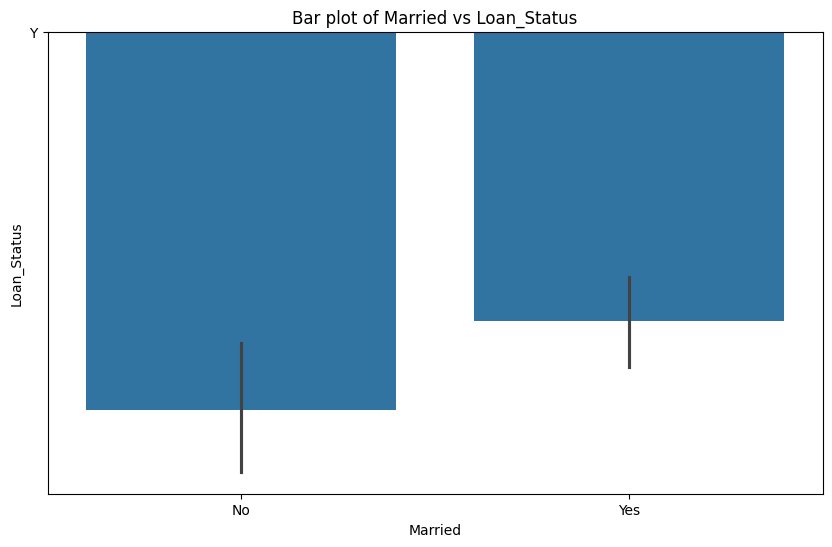

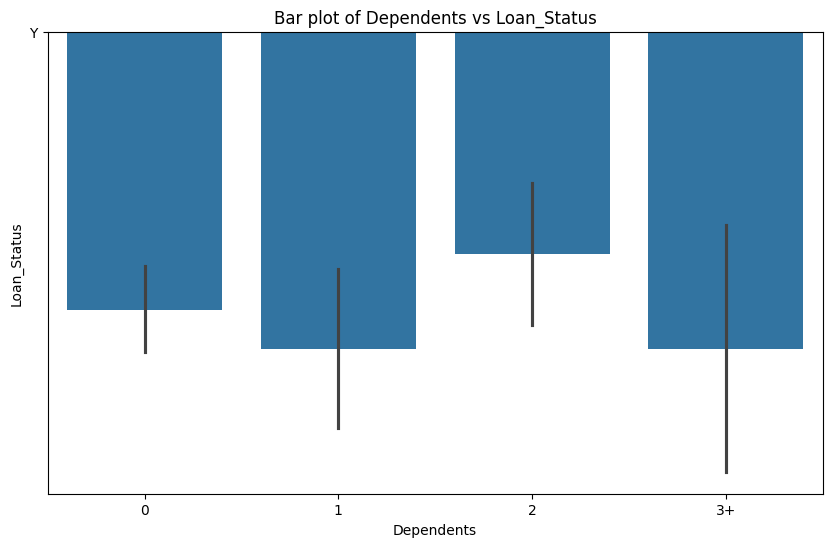

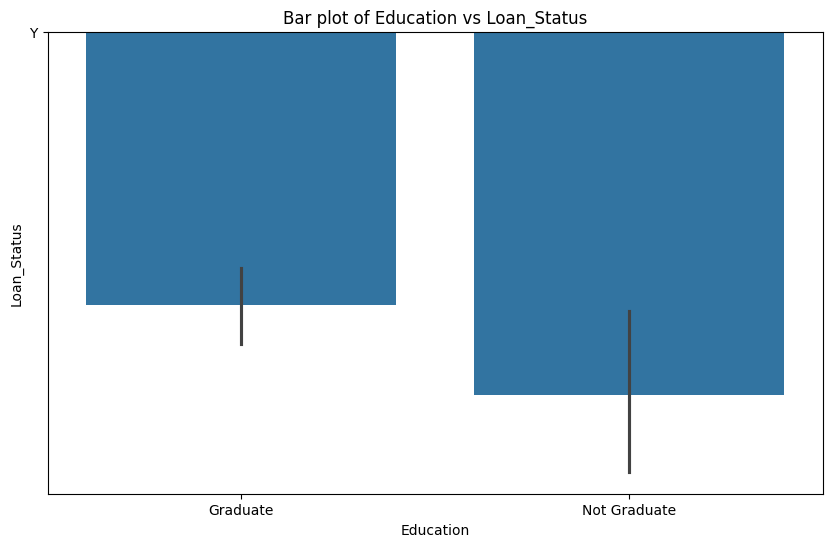

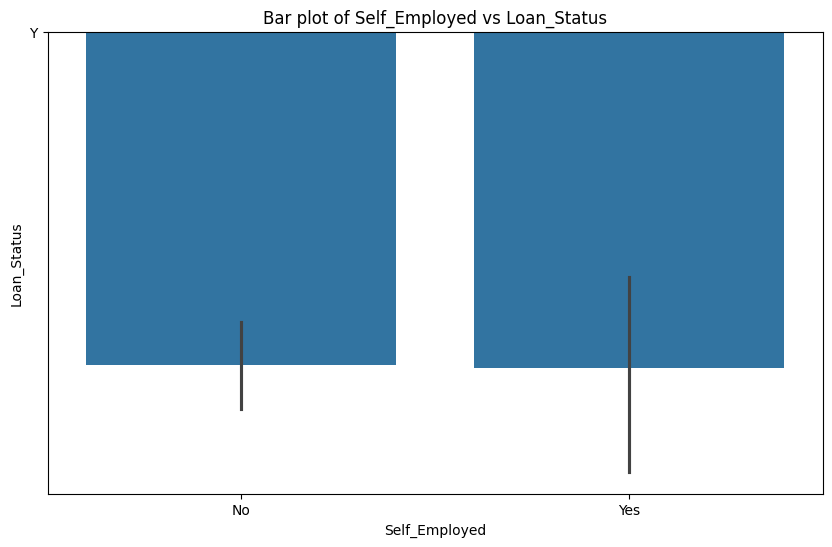

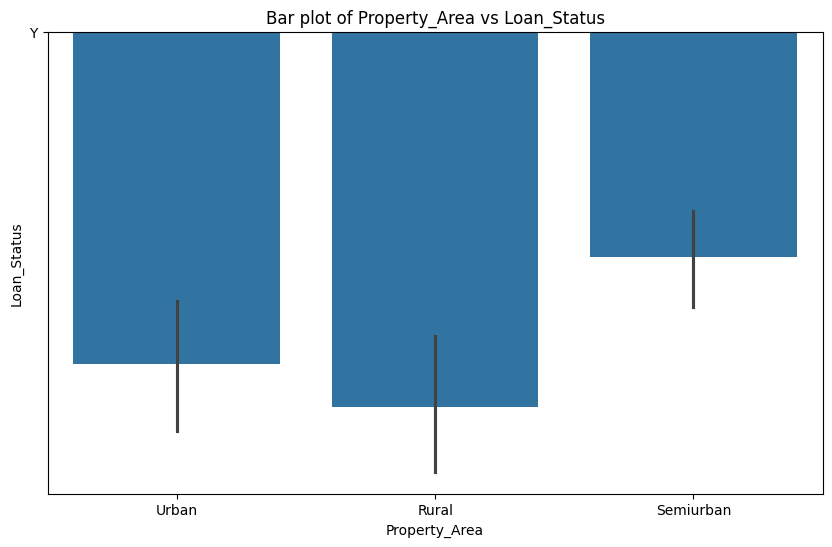

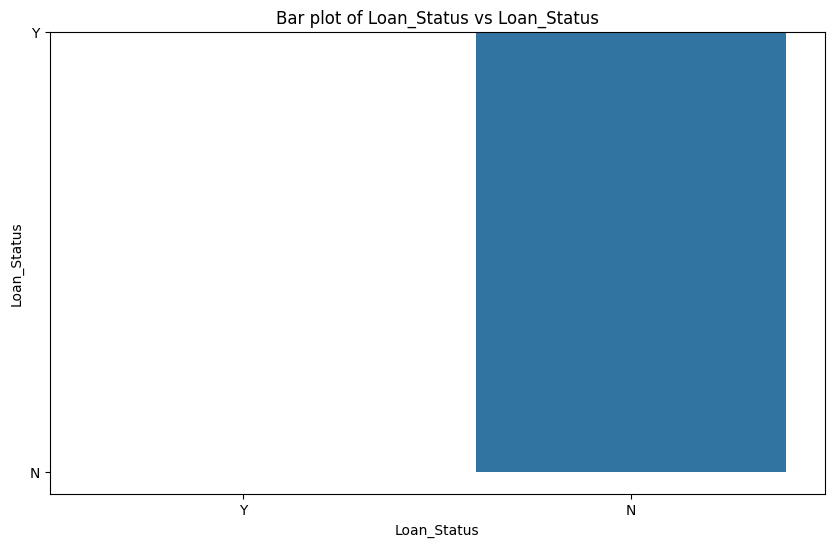

In [40]:
# Scatter plots for numerical columns
for col1 in train_data.select_dtypes(include=['int64', 'float64']).columns:
    for col2 in train_data.select_dtypes(include=['int64', 'float64']).columns:
        if col1!= col2:
            plt.scatter(train_data[col1], train_data[col2])
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.title(f"Scatter plot of {col1} vs {col2}")
            plt.show()

for col in train_data.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=col, y='Loan_Status', data=train_data)
    plt.title(f"Bar plot of {col} vs Loan_Status")
    plt.show()

#Missing value and outlier treatment

In [41]:
# Numerical columns imputation
imputer = SimpleImputer(strategy='mean')
train_data[['ApplicantIncome']] = imputer.fit_transform(train_data[['ApplicantIncome']])

# Imputing columns like 'Loan_Amount_Term', 'Credit_History', 'Gender', and 'Married' with most frequent value
simputer = SimpleImputer(strategy='most_frequent')
train_data[['Loan_Amount_Term']] = simputer.fit_transform(train_data[['Loan_Amount_Term']])
train_data[['Credit_History']] = simputer.fit_transform(train_data[['Credit_History']])
train_data[['Gender']] = simputer.fit_transform(train_data[['Gender']])
train_data[['Married']] = simputer.fit_transform(train_data[['Married']])

# Imputing 'LoanAmount' with median value
simputer = SimpleImputer(strategy='median')
train_data[['LoanAmount']] = simputer.fit_transform(train_data[['LoanAmount']])

# Dropping rows with null values in 'Dependents' and 'Self_Employed'
train_data = train_data.dropna(subset=['Dependents', 'Self_Employed'])

# Verify no null values remain
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#Correlation study: Heat map

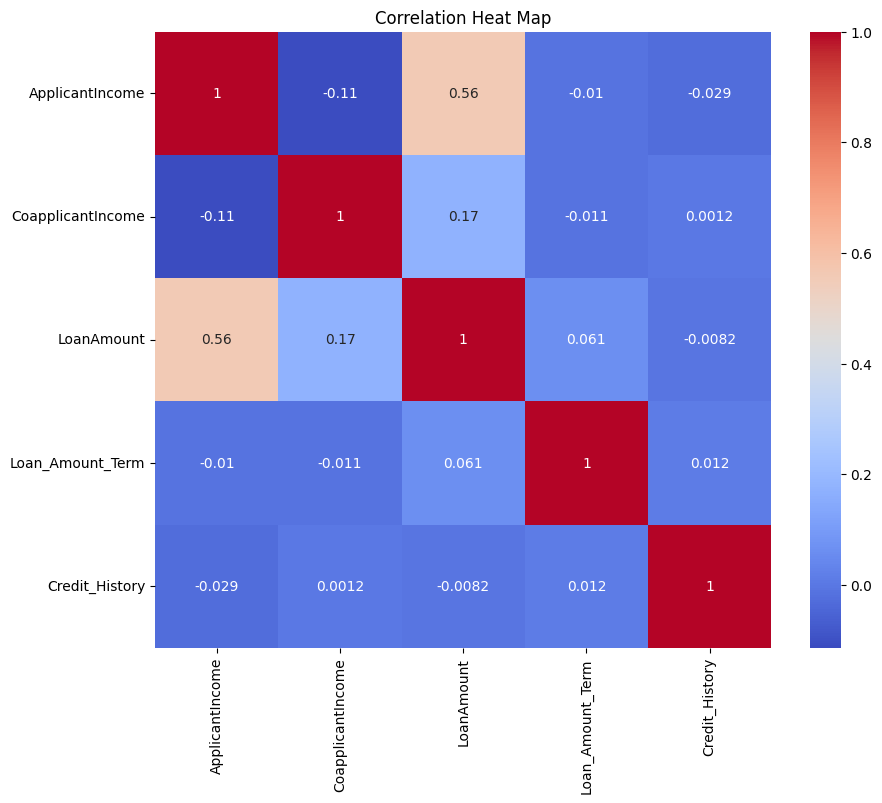

In [42]:
train_data_numeric = train_data.select_dtypes(include=['number'])
# Calculate the correlation matrix
corr_matrix = train_data_numeric.corr()

# Create a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Heat Map")
plt.show()

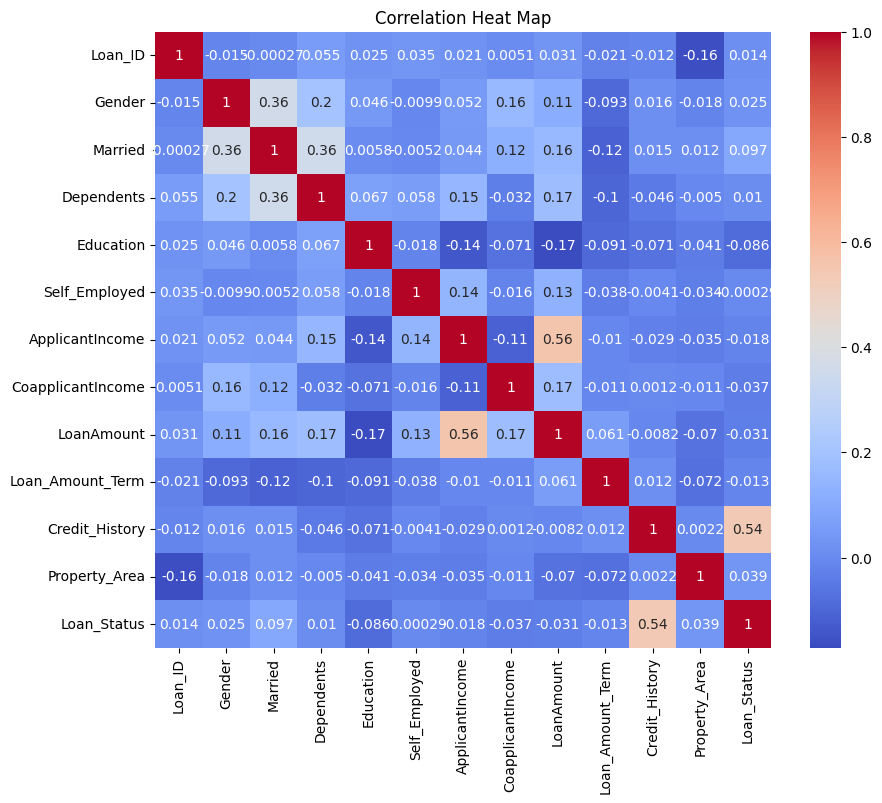

In [43]:
# Encode categorical features
le = LabelEncoder()
for col in train_data.select_dtypes(include=['object']).columns:
  train_data[col] = le.fit_transform(train_data[col])

# Calculate the correlation matrix including the encoded categorical features
corr_matrix = train_data.corr()

# Create a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Heat Map")
plt.show()

#Model building: part 1 (Apply ML classification algorithms)

In [44]:
X = train_data.drop(columns=['Loan_ID', 'Loan_Status'])
y = train_data['Loan_Status']
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# label encoding on the categorical columns
le = LabelEncoder()
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [46]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.77
Confusion Matrix:
[[16 21]
 [ 5 72]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.43      0.55        37
           1       0.77      0.94      0.85        77

    accuracy                           0.77       114
   macro avg       0.77      0.68      0.70       114
weighted avg       0.77      0.77      0.75       114



#Feature engineering

In [47]:
train_data['Dependents'].replace('3+', 3, inplace=True)
train_data['Dependents'] = train_data['Dependents'].astype('int64')

In [48]:
train_data['Income_Per_Person'] = train_data['ApplicantIncome'] / (train_data['Dependents'] + 1)
# Drop unnecessary columns
train_data = train_data.drop(['Dependents'], axis=1)
train_data['Income_Per_Person']

0      5849.000000
1      2291.500000
2      3000.000000
3      2583.000000
4      6000.000000
          ...     
609    2900.000000
610    1026.500000
611    4036.000000
612    2527.666667
613    4583.000000
Name: Income_Per_Person, Length: 567, dtype: float64

In [49]:
train_data['TotalIncome'] = train_data['ApplicantIncome'] + train_data['CoapplicantIncome']
train_data['TotalIncome']

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: TotalIncome, Length: 567, dtype: float64

In [50]:
train_data['EMI'] = train_data['LoanAmount'] / train_data['Loan_Amount_Term']
train_data['EMI']

0      0.355556
1      0.355556
2      0.183333
3      0.333333
4      0.391667
         ...   
609    0.197222
610    0.222222
611    0.702778
612    0.519444
613    0.369444
Name: EMI, Length: 567, dtype: float64

In [51]:
print(X_train.isnull().sum())
print(np.isfinite(X_train).all())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64
Gender               True
Married              True
Dependents           True
Education            True
Self_Employed        True
ApplicantIncome      True
CoapplicantIncome    True
LoanAmount           True
Loan_Amount_Term     True
Credit_History       True
Property_Area        True
dtype: bool


#Model building: part 2 (Apply ML classification algorithms)

In [52]:
X = train_data.drop(columns=['Loan_ID', 'Loan_Status'])  # Exclude Loan_ID and Loan_Status from features
y = train_data['Loan_Status']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
le = LabelEncoder()
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.80
Confusion Matrix:
[[17 20]
 [ 3 74]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.46      0.60        37
           1       0.79      0.96      0.87        77

    accuracy                           0.80       114
   macro avg       0.82      0.71      0.73       114
weighted avg       0.81      0.80      0.78       114



#Hyperparameter Tuning

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=20, cv=5, scoring='accuracy',
                                   random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Evaluate model with best parameters
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.79
Confusion Matrix:
[[14 23]
 [ 1 76]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.38      0.54        37
           1       0.77      0.99      0.86        77

    accuracy                           0.79       114
   macro avg       0.85      0.68      0.70       114
weighted avg       0.82      0.79      0.76       114



#Use the test data to train the model and test data for prediction

In [55]:
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [56]:
test_data.dropna(inplace=True)

In [57]:
test_data['Dependents'].replace('3+', 3, inplace=True)
test_data['Dependents'] = test_data['Dependents'].astype('int64')

In [58]:
test_data['Income_Per_Person'] = test_data['ApplicantIncome'] / (test_data['Dependents'] + 1)
test_data['TotalIncome'] = test_data['ApplicantIncome'] + test_data['CoapplicantIncome']
test_data['EMI'] = test_data['LoanAmount'] / test_data['Loan_Amount_Term']
test_data = test_data.drop(columns = ['Dependents', 'Loan_ID'], axis=1)

In [59]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [60]:
le = LabelEncoder()
for col in test_data.select_dtypes(include=['object']).columns:
    test_data[col] = le.fit_transform(test_data[col])

In [61]:
rf_model.predict(test_data)

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1])